In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns


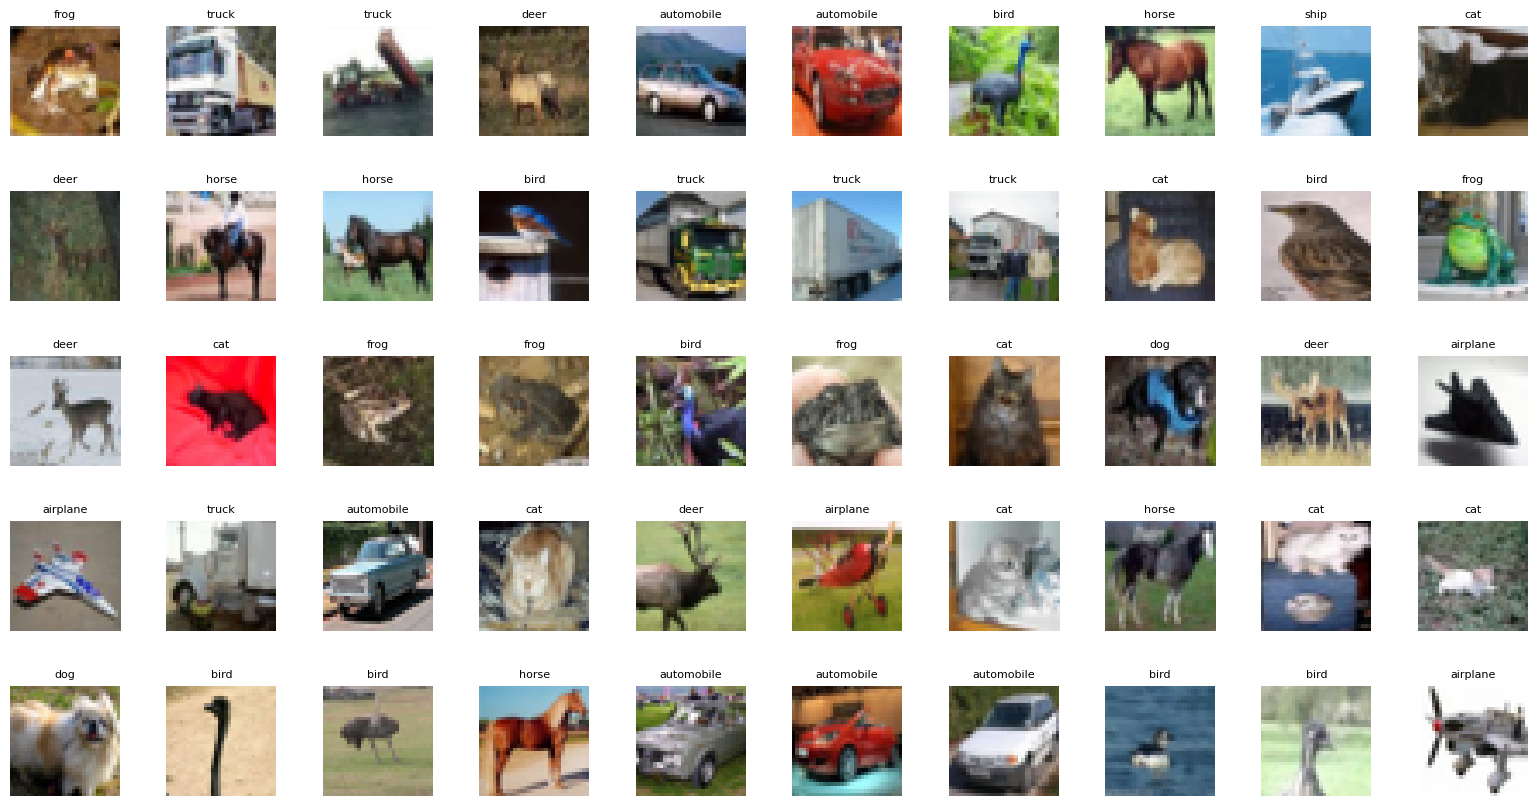

In [4]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define CIFAR-10 classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plot sample images in a grid format
fig, axes = plt.subplots(5, 10, figsize=(20, 10))  # Set up a grid of 5 rows and 10 columns
axes = axes.ravel()  # Flatten the axes object for easier indexing

for i in range(50):  # Adjust the range to the number of images you want to display
    ax = axes[i]
    ax.imshow(x_train[i])  # Display the image at index i
    label_index = y_train[i][0]  # Get the label index
    ax.set_title(classes[label_index], fontsize=8)  # Set the title with the class name
    ax.axis('off')  # Turn off the axis

# Adjust layout to prevent label overlap
plt.subplots_adjust(hspace=0.5, wspace=0.1)  # Adjust horizontal space and width space

plt.show()

In [5]:
def residual_block(x, filters, conv_num=3, activation="relu"):
    # Shortcut
    s = x
    for i in range(conv_num):
        if i == 0:
            x = layers.Conv2D(filters, (3, 3), padding="same", activation=activation)(x)
        else:
            x = layers.Conv2D(filters, (3, 3), padding="same", use_bias=False)(x)
        x = layers.BatchNormalization()(x)
        if i < conv_num - 1:
            x = layers.Activation(activation)(x)

    # Add shortcut value to main path
    if s.shape[-1] != x.shape[-1]:
        s = layers.Conv2D(filters, (1, 1), padding="same")(s)
    x = layers.Add()([x, s])
    x = layers.Activation(activation)(x)
    return x

In [6]:
# Build model
inputs = layers.Input(shape=(32, 32, 3))
x = layers.Conv2D(32, (3, 3), padding="same")(inputs)
x = residual_block(x, 32)
x = layers.MaxPooling2D((2, 2))(x)
x = residual_block(x, 64)
x = layers.MaxPooling2D((2, 2))(x)
x = residual_block(x, 128)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = models.Model(inputs, outputs)

In [8]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 32, 32,    │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 32, 32,    │      9,248 │ conv2d[0][0]      │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 32, 32,    │        128 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 32, 32,    │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        128 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 32, 32,    │      9,216 │ activation_1[0][… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        128 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 32)               │            │ conv2d[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 32, 32,    │          0 │ add[0][0]         │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 16, 16,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 16, 16,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        256 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 16, 16,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 16, 16,    │     36,864 │ activation_3[0][

 Total params: 503,978 (1.92 MB)

 Trainable params: 502,634 (1.92 MB)

 Non-trainable params: 1,344 (5.25 KB)

In [9]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001, mode='min', verbose=1)

In [10]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2
)
datagen.fit(x_train)

# Train the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=30,  
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping, reduce_lr])


Epoch 1/30


C:\Users\mhari\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 168s 101ms/step - accuracy: 0.3422 - loss: 1.8011 - val_accuracy: 0.5731 - val_loss: 1.1877 - learning_rate: 0.0010
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 159s 102ms/step - accuracy: 0.5813 - loss: 1.1963 - val_accuracy: 0.6019 - val_loss: 1.1640 - learning_rate: 0.0010
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 155s 99ms/step - accuracy: 0.6633 - loss: 0.9728 - val_accuracy: 0.7190 - val_loss: 0.8047 - learning_rate: 0.0010
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 161s 103ms/step - accuracy: 0.7064 - loss: 0.8536 - val_accuracy: 0.6252 - val_loss: 1.2092 - learning_rate: 0.0010
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 159s 102ms/step - accuracy: 0.7384 - loss: 0.7690 - val_accuracy: 0.7600 - val_loss: 0.7182 - learning_rate: 0.0010
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 160s 102ms/step - accuracy: 0.7607 - loss: 0.7092 - val_accuracy: 0.7372 - val_loss: 0.8164 - learning_rate: 0.0010
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 159s 101ms/step - accu

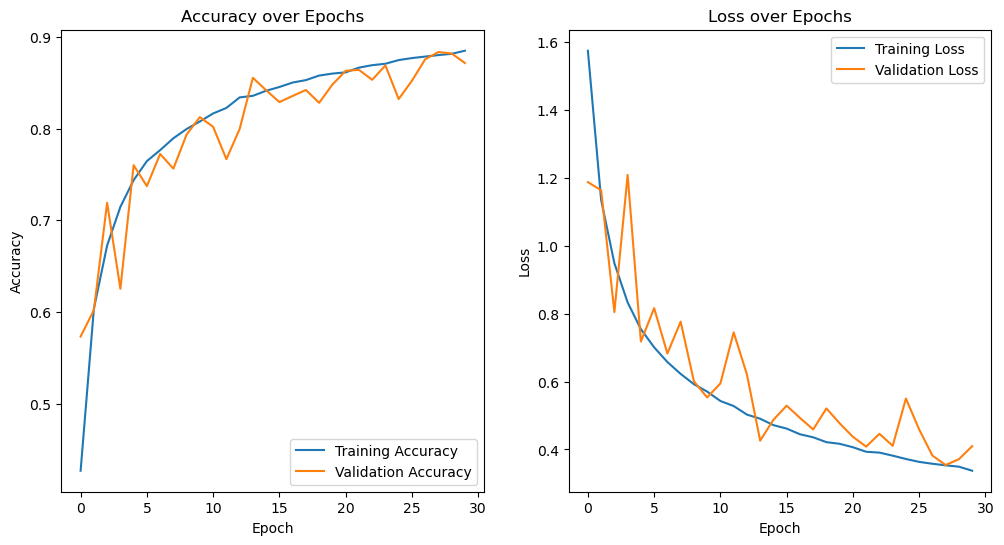

In [11]:
# Plot training and validation history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [12]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.8836 - loss: 0.3492
Test Accuracy: 0.8834999799728394


313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step


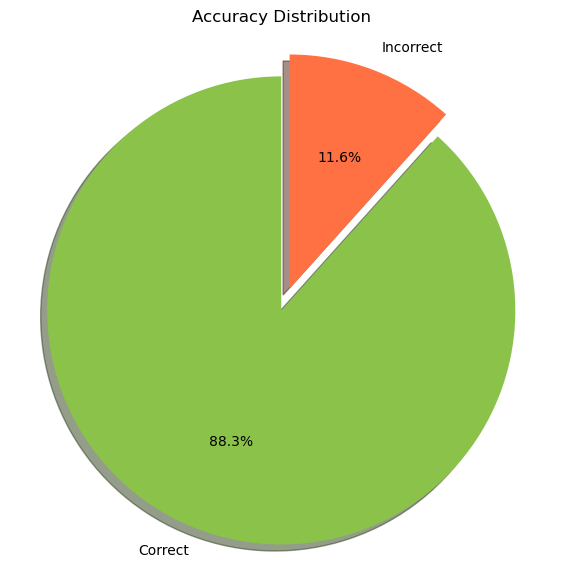

In [14]:
# Generating predictions
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = y_test.flatten()

# Calculate correct and incorrect predictions
correct_predictions = np.sum(y_pred == y_true)
total_predictions = len(y_pred)
incorrect_predictions = total_predictions - correct_predictions

# Pie chart for accuracy distribution
labels = ['Correct', 'Incorrect']
sizes = [correct_predictions, incorrect_predictions]
explode = (0.1, 0)  # only "explode" the 1st slice (i.e., 'Correct')

plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=['#8BC34A', '#FF7043'])
plt.title('Accuracy Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


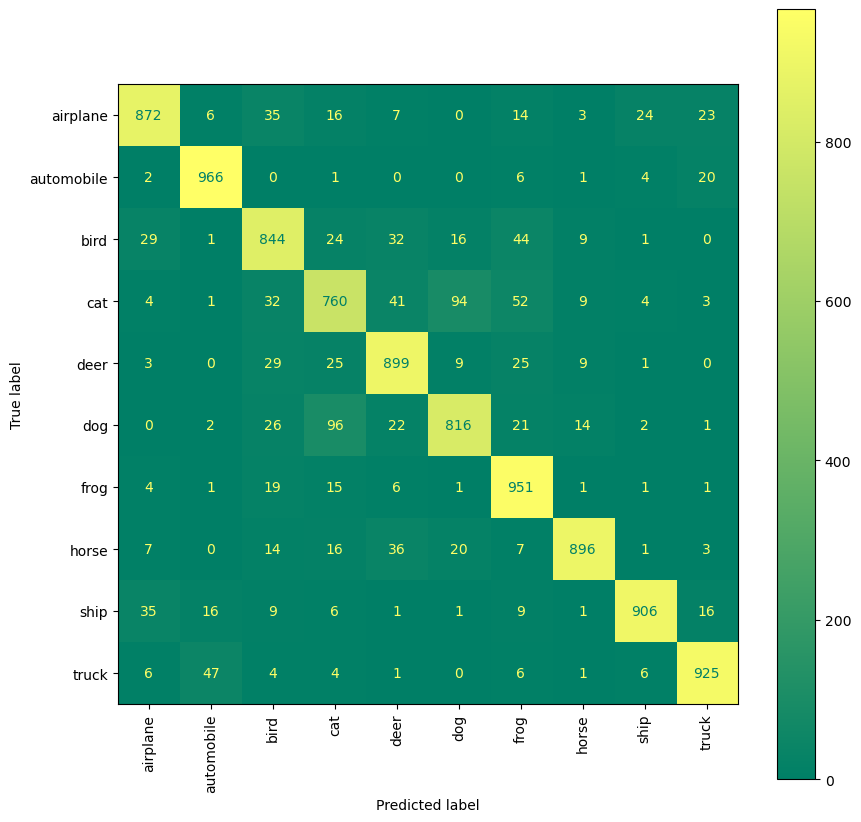

In [25]:
# Generate confusion matrix
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax, cmap='summer')
plt.show()


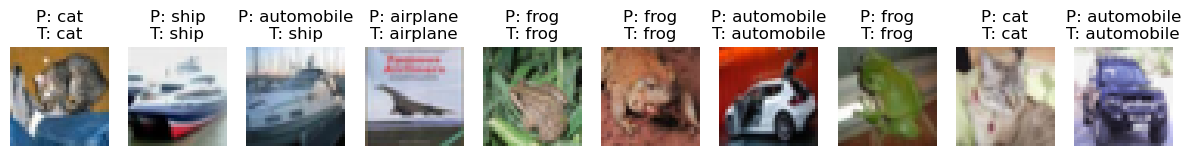

In [29]:
plt.figure(figsize=(15, 2))  # Width, height in inches.
for i in range(10):  # Let's visualize first 10 images
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_test[i])
    plt.title(f'P: {class_names[y_pred[i]]}\nT: {class_names[y_true[i]]}')
    plt.axis('off')
plt.show()